In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def SIR_changing_total_population(S0,I0,R0, beta, gamma, t_max, stepsize, birth_rate, death_rate):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    not_printed_time_yet = True
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx - 1] + I[idx-1] + R[idx-1]
            
            if(N >= 1500 and not_printed_time_yet == True):
                not_printed_time_yet = False
                print("Population reached 1500 at year", t)

            total_birth = N * birth_rate
            total_s_death = S[idx-1] * death_rate
            total_i_death = I[idx-1] * death_rate
            total_r_death = R[idx-1] * death_rate

            dS_dt = (-beta * S[idx-1] * I[idx-1] / N) + total_birth - total_s_death
            dI_dt = (beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]) - total_i_death
            dR_dt = (gamma * I[idx-1]) - total_r_death
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

Population reached 1500 at year 81.2


Text(0.5, 1.0, 'SIR(Zach made this graph)')

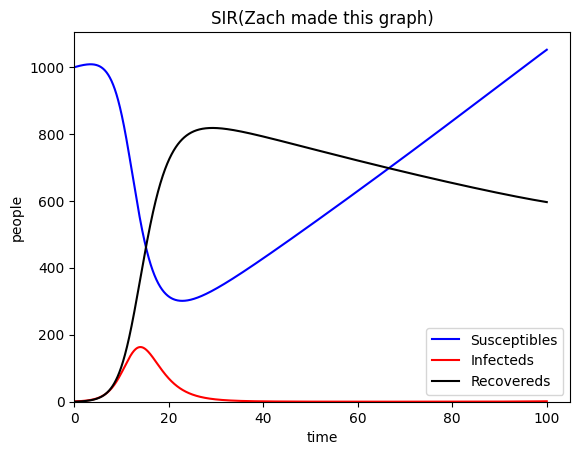

In [52]:
S_init = 999
I_init = 1
R_init = 0
beta = 1
gamma = .5
t_max = 100
stepsize = 0.05
birth_rate = .01
death_rate = birth_rate * .5

# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,T = SIR_changing_total_population(S_init, I_init, R_init, beta, gamma, t_max, stepsize, birth_rate, death_rate)
N = S[t_max]+I[t_max]+R[t_max]
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR(Zach made this graph)")